In [5]:
%env KERAS_BACKEND=tensorflow

env: KERAS_BACKEND=tensorflow


In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.datasets import mnist
from keras.utils import np_utils
from keras.layers import Input
from keras.layers import concatenate
from keras.models import Model
from keras.optimizers import Adam

In [10]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784 )

y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

x_train = (x_train - x_train.min())/(x_train.max() - x_train.min())
x_test = (x_test - x_test.min())/(x_test.max() - x_test.min())

In [11]:
f1 = Dense(100, activation='selu')
f2 = Dense(80, activation='selu')
f3 = Dense(60, activation='selu')
f4 = Dense(40, activation='relu')
f5 = Dense(10, activation='softmax')
f6 = (Dense(10, activation="relu"))
f7 = (Dense(10, activation="sigmoid"))
f8 = (Dense(100, activation="relu"))
f9 = (Dense(10, activation="softmax"))
x = Input(shape=(784,))

h1 = f1(x)
h2 = f2(h1)
h3 = f3(h1)
h4 = f4(h2)
h5 = f5(h2)
h6 = f6(h3)
h7 = f7(h3)

h8 = f8(concatenate([h4, h5, h6, h7]))
y = f9(h8)

model = Model(x, y)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 784)          0                                            
__________________________________________________________________________________________________
dense_10 (Dense)                (None, 100)          78500       input_2[0][0]                    
__________________________________________________________________________________________________
dense_11 (Dense)                (None, 80)           8080        dense_10[0][0]                   
__________________________________________________________________________________________________
dense_12 (Dense)                (None, 60)           6060        dense_10[0][0]                   
__________________________________________________________________________________________________
dense_13 (

In [17]:
model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])
model_fit = model.fit(x_train, y_train, batch_size=200, epochs=30)
model.summary()

Epoch 1/30
60000/60000 [==============================] - 20s 338us/step - loss: 0.0022 - acc: 0.9992
Epoch 2/30
60000/60000 [==============================] - 16s 268us/step - loss: 0.0021 - acc: 0.9993
Epoch 3/30
60000/60000 [==============================] - 18s 307us/step - loss: 0.0022 - acc: 0.9993
Epoch 4/30
60000/60000 [==============================] - 18s 301us/step - loss: 9.9135e-04 - acc: 0.9997 loss: 0.0010 - acc: 0. - ETA: 0s - loss: 0.0010 - a
Epoch 5/30
60000/60000 [==============================] - 17s 285us/step - loss: 0.0015 - acc: 0.9995
Epoch 6/30
60000/60000 [==============================] - 17s 287us/step - loss: 0.0023 - acc: 0.99928s - loss: 0.0017 - acc:  - ETA
Epoch 7/30
60000/60000 [==============================] - 17s 289us/step - loss: 0.0016 - acc: 0.9995
Epoch 8/30
60000/60000 [==============================] - 17s 283us/step - loss: 0.0017 - acc: 0.9994
Epoch 9/30
60000/60000 [==============================] - 17s 282us/step - loss: 0.0011 - acc: 0.

In [20]:
score = model.evaluate(x_test,y_test)
print("loss :",score[0])
print("準確率 :",score[1])

10000/10000 [==============================] - 2s 236us/step
loss : 0.024953941753496543
準確率 : 0.9957499975204468


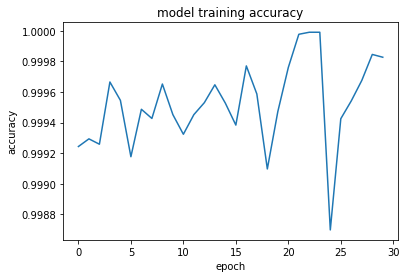

In [28]:
plt.plot(model_fit.history['acc'])
plt.title('model training accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.show()